In [151]:
!pip install nltk
!pip install  tensorflow
import tensorflow
print(tensorflow.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.8.2


In [152]:
import pandas as pd
import numpy as np 
import nltk
import tensorflow

In [153]:
df = pd.read_excel('1000 leads.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           1001 non-null   object
 1   Location            980 non-null    object
 2   Status              998 non-null    object
 3   Status information  977 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


In [154]:
df.head()

,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evn..."
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to ema..."
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|mo...
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said ..."


In [155]:
df.isna().value_counts()

Lead Name  Location  Status   Status information
False      False     False    False                 956
                              True                   21
           True      False    False                  18
           False     True     False                   3
           True      False    True                    3
dtype: int64

In [156]:
df.isna().sum()

Lead Name              0
Location              21
Status                 3
Status information    24
dtype: int64

In [157]:
df['Location'].value_counts()

bangalore        339
hyderabad        237
pune              84
mumbai            77
delhi             63
Hyderabad         26
chennai           22
Bangalore         15
noida             12
Mumbai            11
gurgoan           10
gurgaon            8
USA                8
Pune               4
india              4
vishakapatnam      4
Chennai            4
vijayawada         3
ahmedabad          3
guntur             3
coimbatore         3
ghazibad           2
kolkatta           2
thane              2
Online             2
australia          2
nagpur             2
khammam            1
kerala             1
bihar              1
Gurgaon            1
Nepal              1
ongole             1
gujarat            1
jaipur             1
meerut             1
madurai            1
India              1
mysore             1
Vijayawada         1
hubli              1
kochi              1
aurangabad         1
kadapa             1
Rajamundry         1
jalandhar          1
bilgi              1
rayagada     

#Interpolate in forward order across the column:
df.interpolate(method ='linear', limit_direction ='forward', inplace=True)

In [158]:
df.fillna(method='ffill', inplace=True)

In [159]:
df.isna().sum()

Lead Name             0
Location              0
Status                0
Status information    0
dtype: int64

In [160]:
df["Status information"]

0       14/8/prema: share me details, available in evn...
1       14/8/prema: cal me tmrw, shared details to ema...
2                                        16|AuG|moHan:rnr
3       14/8/17(Surendra):i want only Server 16|AuG|mo...
4       14/8/prema:rnr 16/8/prema: gave info, he said ...
                              ...                        
996     25/4/17(Surendra):please send me details tomor...
997     24/4/17(prema): need CT, but our venue is far....
998     24/Apr/moHan:intrstd in evng batch trail perd ...
999     1/5/17(Surendra):please share me details 11/5/...
1000    24/4/17(prema): shared details need only Cert....
Name: Status information, Length: 1001, dtype: object

In [161]:
df['Status information'].unique()

array(['14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now',
       "14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",
       '16|AuG|moHan:rnr',
       '14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server',
       '14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details',
       '12/8/17(Surendra):i will check demo(attended demo) 14/8/17(Surendra):i will get back 17/8/17(Surendra):i will think and respond 23/11/17(Surendra):not interested',
       '14/8/17(Surendra):asking code',
       '11|aUg|moHan:mail shred for ML Tensorflow corprt 16|AuG|moHan:shared but rnr',
       '11|AuG|moHan:askng code',
       '11/8/prema: RNR 11/8/prema: share me tableau recorded session check n revert 12/

In [162]:
df['Location'].unique()

array(['hyderabad', 'pune', 'bangalore', 'mumbai', 'delhi', 'australia',
       'nagpur', 'madurai', 'mysore', 'chennai', 'kerala', 'hubli',
       'guntur', 'Bangalore', 'Hyderabad', 'jalandhar', 'tiruttani',
       'USA', 'Faridabad', 'Online', 'gurgoan', 'kochi', 'noida',
       'ahmedabad', 'khammam', 'Chennai', 'vishakapatnam', 'solapur',
       'Mumbai', 'nasik', 'Thane', 'UAE', 'Aurangabad', 'rayagada',
       'bilgi', 'gurgaon', 'Rajamundry', 'kadapa', 'aurangabad',
       'kolkatta', 'vijayawada', 'Vijayawada', 'Pune', 'India', 'india',
       'meerut', 'jaipur', 'coimbatore', 'gujarat', 'ghazibad', 'ongole',
       'Nepal', 'Gurgaon', 'bihar', 'thane'], dtype=object)

In [163]:
df.columns

Index(['Lead Name', 'Location', 'Status ', 'Status information'], dtype='object')

In [164]:
df['Status '].unique()

array(['Not Converted', 'Converted ', 'NOt Converted', 'Conveted'],
      dtype=object)

df['Status '] = df['Status '].replace({'Status ': {'Not Converted'and 'NOt Converted': 1, 'Converted'and 'Conveted': 0}},inplace=True)

In [165]:
data = df.copy()

df['Depth'].str.replace('.',',')

df.applymap(lambda x: x.replace('/', '-'))

In [166]:
df['Status ']=df['Status '].apply(lambda x: x.replace('NOt Converted', 'Not Converted'))
df['Status ']=df['Status '].apply(lambda x: x.replace('Conveted', 'Converted '))

In [167]:
df['Status '].unique()

array(['Not Converted', 'Converted '], dtype=object)

In [168]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Status ']= label_encoder.fit_transform(df['Status '])
  
df['Status '].unique()

array([1, 0])

import spacy
import pandas as pd
import en_core_web_sm
nlp = en_core_web_sm.load()

!pip install pyspellchecker 

from spellchecker import SpellChecker

spell = SpellChecker()



for word in data["Location"]:
    # Get the one `most likely` answer
    print(spell.correction(word))

    # Get a list of `likely` options
    print(spell.candidates(word))

In [169]:
df["Location"].dtype

dtype('O')

!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()



for word in data["Location"]:
    # Get the one `most likely` answer
    print(f"{word}:{spell.correction(word)}")
  

for word in data["Location"]:
 # Get a list of `likely` options
  print(f"{word}:{spell.candidates(word)}")

!pip install textblob

import textblob
df.apply(lambda txt: ''.join(textblob.TextBlob(word).correct()))


for word in data["Location"]:
  print(f"{word}:{spell.correction(word)}:probability {spell.word_probability(word)}")

name="chennai"
spell.correction(name)

spell.candidates(name)

!pip install autocorrect
from autocorrect import spell

for word in df["Location"]:
  print(spell(word))

!pip install autocorrect
from autocorrect import spell

for word in df["Location"]:
  print(spell(word))

In [171]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [172]:
corpus =[]
for word in df["Location"]:
  word=word.lower()
    # Get the one `most likely` answer
  print(spell.correction(word))

    # Get a list of `likely` options
  print(spell.candidates(word))
  word =  " ".join(word) #join
  word = word.replace(' ', '')
  corpus.append(word)


hyderabad
{'hyderabad'}
pune
{'pune'}
bangalore
{'bangalore'}
mumbai
{'mumbai'}
hyderabad
{'hyderabad'}
mumbai
{'mumbai'}
delhi
{'delhi'}
pune
{'pune'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
mumbai
{'mumbai'}
bangalore
{'bangalore'}
mumbai
{'mumbai'}
hyderabad
{'hyderabad'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
australia
{'australia'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
mumbai
{'mumbai'}
bangalore
{'bangalore'}
hyderabad
{'hyderabad'}
nagar
{'dagur', 'napper', 'nagus', 'jaipur', 'kanpur', 'nagar', 'rampur'}
hyderabad
{'hyderabad'}
mumbai
{'mumbai'}
bangalore
{'bangalore'}
hyderabad
{'hyderabad'}
bangalore
{'bangalore'}
pune
{'pune'}
bangalore
{'bangalore'}
hyderabad
{'hyderabad'}
bangalore
{'bangalore'}
pune
{'pune'}
bangalore
{'bangalore'}
madurai
{'madurai'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
bangalore
{'bangalore'}
hydera

In [173]:
df["location1"] = pd.DataFrame(corpus)

In [175]:
df

,Lead Name,Location,Status,Status information,location1
0,Raja,hyderabad,1,"14/8/prema: share me details, available in evn...",hyderabad
1,Anirudh Reddy,pune,1,"14/8/prema: cal me tmrw, shared details to ema...",pune
2,Sapna Dewani,bangalore,0,16|AuG|moHan:rnr,bangalore
3,suresh,mumbai,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,mumbai
4,Akshay Shinde,hyderabad,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",hyderabad
...,...,...,...,...,...
996,vipin,bangalore,1,25/4/17(Surendra):please send me details tomor...,bangalore
997,dheeraj,chennai,1,"24/4/17(prema): need CT, but our venue is far....",chennai
998,kuldeep singh,bangalore,1,24/Apr/moHan:intrstd in evng batch trail perd ...,bangalore
999,ankur sharma,bangalore,1,1/5/17(Surendra):please share me details 11/5/...,bangalore


In [176]:
df["location2"]  = df.apply(lambda x: x['Location'] in x['location1'] , axis=1).astype(str)

In [177]:
df["location2"].unique()

array(['True', 'False'], dtype=object)

In [178]:
#location columns was filter on text

In [179]:
df.drop(["Location"],axis=1, inplace =True)

In [180]:
df

,Lead Name,Status,Status information,location1,location2
0,Raja,1,"14/8/prema: share me details, available in evn...",hyderabad,True
1,Anirudh Reddy,1,"14/8/prema: cal me tmrw, shared details to ema...",pune,True
2,Sapna Dewani,0,16|AuG|moHan:rnr,bangalore,True
3,suresh,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,mumbai,True
4,Akshay Shinde,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",hyderabad,True
...,...,...,...,...,...
996,vipin,1,25/4/17(Surendra):please send me details tomor...,bangalore,True
997,dheeraj,1,"24/4/17(prema): need CT, but our venue is far....",chennai,True
998,kuldeep singh,1,24/Apr/moHan:intrstd in evng batch trail perd ...,bangalore,True
999,ankur sharma,1,1/5/17(Surendra):please share me details 11/5/...,bangalore,True


In [181]:
df.drop(["location2"],axis=1, inplace =True)

In [182]:
df

,Lead Name,Status,Status information,location1
0,Raja,1,"14/8/prema: share me details, available in evn...",hyderabad
1,Anirudh Reddy,1,"14/8/prema: cal me tmrw, shared details to ema...",pune
2,Sapna Dewani,0,16|AuG|moHan:rnr,bangalore
3,suresh,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,mumbai
4,Akshay Shinde,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",hyderabad
...,...,...,...,...
996,vipin,1,25/4/17(Surendra):please send me details tomor...,bangalore
997,dheeraj,1,"24/4/17(prema): need CT, but our venue is far....",chennai
998,kuldeep singh,1,24/Apr/moHan:intrstd in evng batch trail perd ...,bangalore
999,ankur sharma,1,1/5/17(Surendra):please share me details 11/5/...,bangalore


In [183]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df[df["Lead Name"].duplicated()==True]["Lead Name"].unique()

array(['ravi', 'Raja', 'Naveen', 'mohit', 'Anand', 'Vishal', 'vinod',
       'Raj', 'Karthik', 'Vijay', 'sathvik', 'Manish', 'suresh',
       'Sandeep', 'Mallesh', 'Deepak', 'Gopal', 'Rupam', 'Abhishek',
       'Arun', 'Ramesh', 'Suresh', 'satya', 'jaswanth', 'Srinivas',
       'Prakash', 'rajesh', 'saurabh', 'Karunakar', 'naveen', 'Aditya',
       'Prashant', 'Hemanth', 'Siva', 'Gowtham', 'Sunil', 'Sudhakar',
       'Rajesh', 'Rashmi', 'Anoop', 'Amit', 'Ashwini', 'Ravi', 'Priyanka',
       'Sachin', 'Raghu', 'Kiran', 'Shyam', 'Surya', 'Vinay', 'srinivas',
       'Nidhi', 'Venkat', 'Nitin', 'Pavan Kumar', 'Rishi', 'gaurav',
       'vivek', 'Divya', 'Ajay', 'Pramod', 'Anil', 'krishna', 'Harini',
       'Anup', 'Kaushik', 'Abdul', 'Maneesh', 'Pavan', 'lakshmi',
       'Basavaraj', 'ashish', 'Shilpa', 'manoj', 'sandeep', 'harish',
       'anil'], dtype=object)

In [185]:
list(df.columns)

['Lead Name', 'Status ', 'Status information', 'location1']

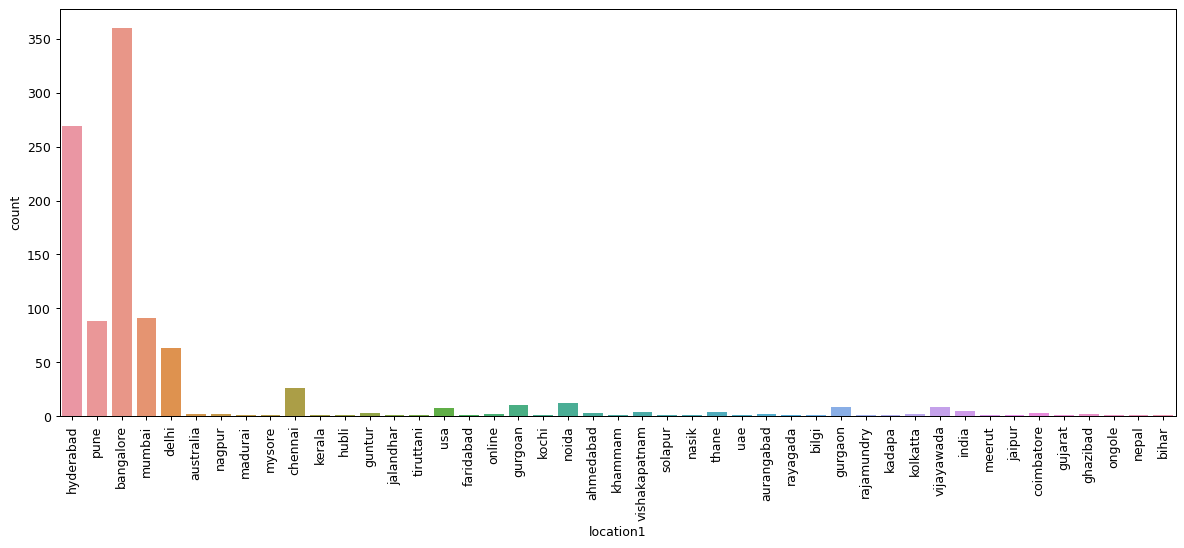

In [186]:
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=df, x="location1")
plt.xticks(Rotation="vertical")
plt.show()

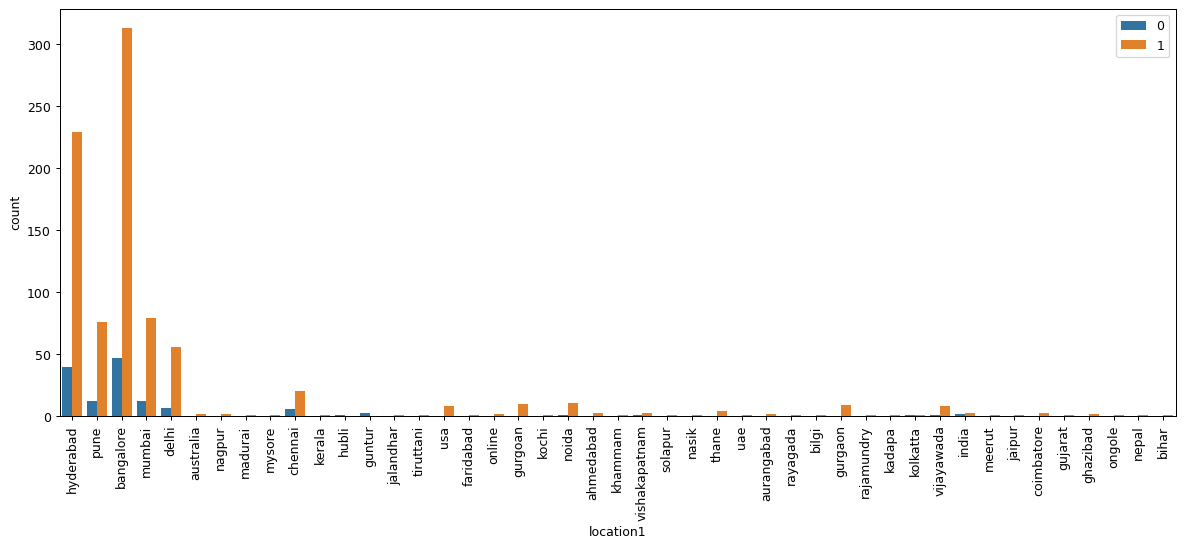

In [187]:


# lets find out what locations have more num of converted/non converted rate
plt.figure(figsize=(16,6), dpi=90)
sns.countplot(data=df, x="location1", hue="Status ")
plt.xticks(Rotation="vertical")
plt.legend(loc="upper right")
plt.show()

In [189]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [190]:
for review in df["Status information"]:
  spell.correction(review)
  spell.candidates(review)
  
    # Get the one `most likely` answer
  

    # Get a list of `likely` options
  
  review =  " ".join(review) #join
  review = review.replace(' ', '')

In [191]:
review

"24/4/17(prema):shareddetailsneedonlyCert.26/4/17(prema):needtocallat4pmInameetingwillcallater29/4/17(prema):rnr2/5/17(prema):willgetbacktou11/5/17(gowtham)timnedded31/5/17|(gowtham)RNR2/6/17(gowtham)RNR7/6/17(prema)RNR8/6/17(prema):sharedITILintermediatedetails12/6/17(prema)RNR13/6/17(prema)RNR14/6/17(prema)RNR16/6/17(prema):i'minameetingcalubacklater28/6/17(prema):RNR"

In [193]:
from nltk.stem.porter import PorterStemmer
import nltk
import re
nltk.download('stopwords')
nltk.download('omw-1.4')
  
lamma = WordNetLemmatizer()

corpus = []
for i in range(0,len(df)):
  #print(i)
  review = re.sub("[^a-zA-z]"," ",df["Status information"][i])
  review = review.lower()
  review = review.split()

  review = [lamma.lemmatize(word) for word in review if not word in stopwords.words("english")]
  review = "  ".join(review)
  corpus.append(review) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [194]:
corpus

['prema  share  detail  available  evng  prema  postponed  plan  training  currently  prema  interested',
 'prema  cal  tmrw  shared  detail  email  prema  share  detail  email  check  n  revert  prema  received  email  looking  asq  certification',
 'aug  mohan  rnr',
 'surendra  want  server  aug  mohan  cal  busy  aug  mohan  reg  server',
 'prema  rnr  prema  gave  info  said  revert  hr  prema  planning  next  month  share  detail',
 'surendra  check  demo  attended  demo  surendra  get  back  surendra  think  respond  surendra  interested',
 'surendra  asking  code',
 'aug  mohan  mail  shred  ml  tensorflow  corprt  aug  mohan  shared  rnr',
 'aug  mohan  askng  code',
 'aug  mohan  askng  code',
 'prema  rnr  prema  share  tableau  recorded  session  check  n  revert  prema  reachable  prema  rnr  prema  rotational  shift  check  detail  n  confirm  prema  rnr  surendra  confirm  tmrw  prema  rnr  prema  share  detail  webinar  rd',
 'prema  call  pm  prema  om  meeting  cal  l


def correction(txt):
  review = re.sub("[^a-zA-z]"," ",corpus)
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words("english")] # word_tokenization, stop_word/punctuation removal
  review = [lamma.lemmatize(i) for i in x] # there are still a lot of incorrect spellings
  return " ".join(review)

wordnet = WordNetLemmatizer()
import re

import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize 


def preprocess2(txt):
  x = txt.lower()
  x = re.sub("\d+[/?]\w+[/?]\w+:|\d+[|]\w+[|]\w+:|\d+[/]\w+[/]\w+[(]\w+[)]:?", "", x)
  x = re.sub("int[a-z]+d$", "interested", x)
  x = re.sub("[\d+-?,'.]", "", x)

for word in range(0,len(df["Status information"])):df.drop(['A'], axis=1)
  review = re.sub('^[a-zA-z]'," ",df["Status information"][word])
  review = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", review)
  review = review.lower()
  review = re.sub('\s+', ' ', review).strip() #spacaes
  review = re.sub(r'\d+[//]', '', review) #number
  review = re.sub(r'\d+[(]', '', review)
  review = re.sub(r'\d+[)]', '', review)
  review = re.sub(r'\d+[()]', '', review)
  review = re.sub(r'\d+[:]', '', review)
  review = review.join([i for i in corpus if not i.isdigit()])
  
  review = review.split()
  #review = word_tokenize(review)
  
  review = [wordnet.lemmatize(word) for word in review if not word in stopwords.words("english")]
  review = " ".join(review)
  corpus.append(review) #cleaning,lower,split,lemmatization

#"#$%&\'()*+,-./:;?@[\\]^_{|}~`
import string
PUNCT_TO_REMOVE = string.punctuation
ans = review.translate(str.maketrans(”, ”, PUNCT_TO_REMOVE))

!pip install contractions
import contractions
contractions.fix(review)

In [195]:
df["information"] = pd.DataFrame(corpus)

In [196]:
df

,Lead Name,Status,Status information,location1,information
0,Raja,1,"14/8/prema: share me details, available in evn...",hyderabad,prema share detail available evng prema ...
1,Anirudh Reddy,1,"14/8/prema: cal me tmrw, shared details to ema...",pune,prema cal tmrw shared detail email prema...
2,Sapna Dewani,0,16|AuG|moHan:rnr,bangalore,aug mohan rnr
3,suresh,1,14/8/17(Surendra):i want only Server 16|AuG|mo...,mumbai,surendra want server aug mohan cal busy ...
4,Akshay Shinde,1,"14/8/prema:rnr 16/8/prema: gave info, he said ...",hyderabad,prema rnr prema gave info said revert h...
...,...,...,...,...,...
996,vipin,1,25/4/17(Surendra):please send me details tomor...,bangalore,surendra please send detail tomorrow afte...
997,dheeraj,1,"24/4/17(prema): need CT, but our venue is far....",chennai,prema need ct venue far shared detail d...
998,kuldeep singh,1,24/Apr/moHan:intrstd in evng batch trail perd ...,bangalore,apr mohan intrstd evng batch trail perd ...
999,ankur sharma,1,1/5/17(Surendra):please share me details 11/5/...,bangalore,surendra please share detail gowtham alre...


In [197]:
df.columns

Index(['Lead Name', 'Status ', 'Status information', 'location1',
       'information'],
      dtype='object')

In [198]:
df.drop(["Status information","Lead Name"],axis=1,inplace = True)

df.drop(['Status information', 'Lead Name'], axis=1,inplace =True)

from tensorflow.keras.preprocessing.sequence import pad_sequences #same no of words in every sentences

sent_length = 9 
embedded_docs = pad_sequences(onehot_repr,padding = "pre",maxlen = sent_length) #pre )0 in front and then words number we can use post print(embedded_docs)

from tensorflow.keras.preprocessing.sequence import pad_sequences #same no of words in every sentences

sent_length = 9
embedded_docs = pad_sequences(onehot_repr,padding = "pre",maxlen = sent_length) #pre )0 in front and then words number we can use post
print(embedded_docs)

In [199]:
df.isnull().sum()

Status         0
location1      0
information    0
dtype: int64

In [200]:
#bag of word Dictornary of words w.r. to words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 500) # words from aall sentences
X = cv.fit_transform(df["information"]).toarray()
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
df.location1=le.fit_transform(df["location1"]) 
add_col = df["location1"].values.reshape(-1,1)

#bag of word Dictornary of words w.r. to words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 500) # words from aall sentences
X = cv.fit_transform(df["status_information"]).toarray()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.location1=le.fit_transform(df["location1"])
add_col = df["location1"].values.reshape(-1,1)

In [201]:
df

,Status,location1,information
0,1,16,prema share detail available evng prema ...
1,1,35,prema cal tmrw shared detail email prema...
2,0,3,aug mohan rnr
3,1,27,surendra want server aug mohan cal busy ...
4,1,16,prema rnr prema gave info said revert h...
...,...,...,...
996,1,3,surendra please send detail tomorrow afte...
997,1,6,prema need ct venue far shared detail d...
998,1,3,apr mohan intrstd evng batch trail perd ...
999,1,3,surendra please share detail gowtham alre...


In [202]:
add_col

array([[16],
       [35],
       [ 3],
       ...,
       [ 3],
       [ 3],
       [ 3]])

In [203]:
X = np.hstack((df,add_col ))

In [204]:
X.shape,X,X.dtype

((1001, 4), array([[1, 16,
         'prema  share  detail  available  evng  prema  postponed  plan  training  currently  prema  interested',
         16],
        [1, 35,
         'prema  cal  tmrw  shared  detail  email  prema  share  detail  email  check  n  revert  prema  received  email  looking  asq  certification',
         35],
        [0, 3, 'aug  mohan  rnr', 3],
        ...,
        [1, 3,
         'apr  mohan  intrstd  evng  batch  trail  perd  apr  mohan  alrdy  reg  exlr',
         3],
        [1, 3, 'surendra  please  share  detail  gowtham  already  done',
         3],
        [1, 3,
         'prema  shared  detail  need  cert  prema  need  call  pm  meeting  cal  later  prema  rnr  prema  get  back  u  gowtham  tim  nedded  gowtham  rnr  gowtham  rnr  prema  rnr  prema  shared  itil  intermediate  detail  prema  rnr  prema  rnr  prema  rnr  prema  meeting  cal  u  back  later  prema  rnr',
         3]], dtype=object), dtype('O'))

add_col

X = np.hstack((df,add_col ))

X.shape

X,X.dtype

In [205]:
y = df["Status "]
y

0       1
1       1
2       0
3       1
4       1
       ..
996     1
997     1
998     1
999     1
1000    1
Name: Status , Length: 1001, dtype: int64

# pandas.merge() by Column
df2=pd.merge(X,df, how='outer')

In [206]:
# Upsampling using resample class
from sklearn.utils import resample

#separating the class
df_major = df[df["Status "]==1]
df_minor = df[df["Status "]==0]

df_minor_upsampled = resample(df_minor, 
                                 replace=True,     # sample with replacement
                                 n_samples=600,    # to match majority class
                                 random_state=20) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_major, df_minor_upsampled], axis=0)

In [207]:
df_upsampled

,Status,location1,information
0,1,16,prema share detail available evng prema ...
1,1,35,prema cal tmrw shared detail email prema...
3,1,27,surendra want server aug mohan cal busy ...
4,1,16,prema rnr prema gave info said revert h...
5,1,27,surendra check demo attended demo surendr...
...,...,...,...
326,0,16,prema shared email prema shared email pr...
75,0,6,prema rnr prema inquired previously inter...
260,0,3,surendra rnr asking code surendra asking ...
45,0,8,surendra rnr surendra get back surendra rnr


In [208]:
from sklearn.model_selection import train_test_split
X_train, X_hold= train_test_split(df_upsampled, test_size=0.6, random_state=42,stratify = df_upsampled["Status "])

In [209]:
df_upsampled["Status "].value_counts()

1    867
0    600
Name: Status , dtype: int64

##Topic Modelling

In [210]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [211]:
import nltk 
from nltk.stem.porter import PorterStemmer
stmmmer = PorterStemmer()
def tokenize(text):
  tokens = [word for word in nltk.word_tokenize(text) if (len(word)>3 and len (word.strip("Xx/"))>2)]
  stems = [stmmmer.stem(item) for item in tokens]
  return stems

In [212]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf = TfidfVectorizer(tokenizer= tokenize,max_features=400,use_idf = False,max_df =0.75, stop_words= 'english') # we will use tf for classification


#cv = CountVectorizer(max_features=500, ngram_range=(2,2)) # we will use cv for topic modeling

In [213]:
nltk.download('punkt')
tf_vector = tf.fit_transform(X_train.information)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'wh

In [214]:
tf_vector.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [215]:
tf.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abdul',
 'abl',
 'accept',
 'address',
 'afternoon',
 'aftr',
 'agenda',
 'alrdi',
 'alreadi',
 'altdi',
 'amar',
 'ambatch',
 'analyt',
 'anoth',
 'approach',
 'area',
 'ask',
 'atend',
 'atted',
 'attend',
 'attnd',
 'audibl',
 'august',
 'auugust',
 'avail',
 'bangalor',
 'batch',
 'better',
 'blockchain',
 'break',
 'btech',
 'busi',
 'cald',
 'certif',
 'chang',
 'chck',
 'check',
 'citi',
 'cla',
 'clasroom',
 'class',
 'classrom',
 'classroom',
 'classsroom',
 'client',
 'cloud',
 'clsrom',
 'clsroom',
 'cmng',
 'cmpni',
 'cncting',
 'cnfrm',
 'cnnctng',
 'cnnect',
 'cntcd',
 'code',
 'colleg',
 'come',
 'comfirm',
 'comfort',
 'compani',
 'complet',
 'comput',
 'conatct',
 'concern',
 'conduct',
 'confirm',
 'confrim',
 'congirm',
 'connct',
 'connect',
 'connectd',
 'connecti',
 'contact',
 'continu',
 'correct',
 'councel',
 'coupl',
 'cours',
 'coverag',
 'current',
 'cutcal',
 'data',
 'deatil',
 'decid',
 'decis',
 'delay',
 'delet',
 'demo',
 'desktop',
 'detai',
 'deti

In [216]:
# topic modeling using LDA(latent dirichlet allocation) 
from sklearn.decomposition import LatentDirichletAllocation

In [217]:
lda_model = LatentDirichletAllocation(n_components=2,learning_method='online',random_state=42,max_iter=5,learning_offset = 50,n_jobs = 1  )#batch and online(mini batch)
w1 = lda_model.fit_transform(tf_vector)
w1=lda_model.components_

In [218]:
w1 #higher 0. get topic  1 and 2 

array([[  0.64127682,   0.64463926,   1.0953618 ,   0.63893497,
          0.69887384,   2.39858558,   1.20284889,   2.08897985,
          1.39642182,   0.72750717,   2.49590822,   0.64337004,
          0.70067329,   0.8129766 ,   0.61476535,   0.76882511,
          2.72537721,   0.86931769,   0.91265632,   3.04438604,
          2.49485784,   0.6173794 ,   1.00981961,   0.65544103,
          0.74252051,   0.70182476,   1.74383131,   0.68654644,
          0.7617752 ,   0.70772556,   0.90376292,   3.85750159,
          0.91962019,   0.75159008,   0.67163543,   1.22199325,
          4.93795391,   0.79068145,   0.61406289,   0.64109408,
          0.69620723,   0.79723036,   1.53051161,   0.6802663 ,
          0.630717  ,   0.6862558 ,   1.05365131,   0.65144683,
          2.69050692,   0.88050077,   0.64647811,   1.06804034,
          0.89992879,   0.66520024,   0.70153619,   0.65977208,
          0.63690235,   2.75145044,   0.85457397,   0.68366282,
          0.63373103,   0.78684362,   0.

In [219]:
num_word = 15
vocab = np.array(tf.get_feature_names())
top_words =  lambda t:[vocab[i] for i in np.argsort(t)[:-num_word-1:-1]]
topic_words =([top_words(t) for t in w1])
topics =[" ".join(t) for t in topic_words]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [220]:
topics

['mohan soma juli intrstd demo june need today check tmrw join share busi know frnd',
 'surendra prema share gowtham busi want check mail session join email soma connect weekend need']

In [ ]:
colnames = ["topics" + str(i) for i in range(lda_model.n_components)]
docnames = ["Doc" + str(i) for i in range(len(X_train.information))]
df_doc_topic = pd.DataFrame(np.round(1:,1),columns  =colnames, index= docnames)
significant_topic=np.argmax(df_doc_topic.values , axis =1)
df_doc_topic["Domiant_topic"]  = significant_topic #creating doc topic matrix to see which word is contributing towrds topic

In [ ]:
df_doc_topic

In [222]:
import gensim 
from gensim import corpora
corpus = [i.split() for i in df_upsampled["information"]]

In [223]:
corpus[:5]

[['prema',
  'share',
  'detail',
  'available',
  'evng',
  'prema',
  'postponed',
  'plan',
  'training',
  'currently',
  'prema',
  'interested'],
 ['prema',
  'cal',
  'tmrw',
  'shared',
  'detail',
  'email',
  'prema',
  'share',
  'detail',
  'email',
  'check',
  'n',
  'revert',
  'prema',
  'received',
  'email',
  'looking',
  'asq',
  'certification'],
 ['surendra',
  'want',
  'server',
  'aug',
  'mohan',
  'cal',
  'busy',
  'aug',
  'mohan',
  'reg',
  'server'],
 ['prema',
  'rnr',
  'prema',
  'gave',
  'info',
  'said',
  'revert',
  'hr',
  'prema',
  'planning',
  'next',
  'month',
  'share',
  'detail'],
 ['surendra',
  'check',
  'demo',
  'attended',
  'demo',
  'surendra',
  'get',
  'back',
  'surendra',
  'think',
  'respond',
  'surendra',
  'interested']]

In [224]:
# creating a dictionary first
dict_ = corpora.Dictionary(corpus)

print(dict_)

Dictionary(1119 unique tokens: ['available', 'currently', 'detail', 'evng', 'interested']...)


In [225]:

# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in corpus]

In [226]:
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 3),
  (8, 1),
  (9, 1)],
 [(2, 2),
  (7, 3),
  (8, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 3),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(11, 1), (21, 2), (22, 1), (23, 2), (24, 1), (25, 2), (26, 1), (27, 1)],
 [(2, 1),
  (7, 3),
  (8, 1),
  (18, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1)],
 [(4, 1),
  (13, 1),
  (26, 4),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(26, 1), (42, 1), (43, 1)],
 [(19, 1),
  (21, 2),
  (23, 2),
  (34, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1)],
 [(21, 1), (23, 1), (43, 1), (49, 1)],
 [(21, 1), (23, 1), (43, 1), (49, 1)],
 [(2, 2),
  (7, 8),
  (8, 2),
  (13, 2),
  (16, 2),
  (18, 1),
  (20, 1),
  (26, 1),
  (34, 4),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(2, 1),
  (7, 6),
  (11, 1),
  (19, 1

In [227]:

Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dict_, passes=1, random_state=0, eval_every=None)

In [228]:
ldamodel.print_topics()
# we need to manually check whethere the topics are different from one another or not

[(0,
  '0.065*"prema" + 0.048*"detail" + 0.044*"mohan" + 0.036*"rnr" + 0.035*"shared" + 0.030*"surendra" + 0.022*"july" + 0.019*"aug" + 0.013*"share" + 0.013*"call"'),
 (1,
  '0.098*"rnr" + 0.086*"surendra" + 0.068*"prema" + 0.051*"mohan" + 0.047*"soma" + 0.031*"call" + 0.031*"detail" + 0.024*"shared" + 0.022*"july" + 0.017*"gowtham"')]

In [229]:
# Extracting Topics
for i in ldamodel.print_topics(num_topics=2, num_words=10):
  print(i)

(0, '0.065*"prema" + 0.048*"detail" + 0.044*"mohan" + 0.036*"rnr" + 0.035*"shared" + 0.030*"surendra" + 0.022*"july" + 0.019*"aug" + 0.013*"share" + 0.013*"call"')
(1, '0.098*"rnr" + 0.086*"surendra" + 0.068*"prema" + 0.051*"mohan" + 0.047*"soma" + 0.031*"call" + 0.031*"detail" + 0.024*"shared" + 0.022*"july" + 0.017*"gowtham"')


In [230]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.93402696), (1, 0.06597309)]
doc :  1 [(0, 0.96216965), (1, 0.03783038)]
doc :  2 [(0, 0.43491733), (1, 0.56508267)]
doc :  3 [(0, 0.068662725), (1, 0.9313373)]
doc :  4 [(0, 0.05180914), (1, 0.94819087)]
doc :  5 [(0, 0.31526634), (1, 0.6847337)]
doc :  6 [(0, 0.9204025), (1, 0.07959751)]
doc :  7 [(0, 0.8712904), (1, 0.12870963)]
doc :  8 [(0, 0.87127656), (1, 0.12872341)]
doc :  9 [(0, 0.04171284), (1, 0.9582872)]
doc :  10 [(0, 0.101665504), (1, 0.8983345)]
doc :  11 [(0, 0.7837434), (1, 0.21625666)]
doc :  12 [(0, 0.78376395), (1, 0.21623607)]
doc :  13 [(0, 0.022950971), (1, 0.977049)]
doc :  14 [(0, 0.022944825), (1, 0.9770552)]
doc :  15 [(0, 0.022948792), (1, 0.9770512)]
doc :  16 [(0, 0.78695965), (1, 0.21304037)]
doc :  17 [(0, 0.026422737), (1, 0.97357726)]
doc :  18 [(0, 0.90793943), (1, 0.092060566)]
doc :  19 [(0, 0.23432025), (1, 0.7656797)]
doc :  20 [(0, 0.9214152), (1, 0.078584746)]
doc :  21 [(0, 0.032526914), (1, 0.9674731)]
doc :  22 [(0, 0.41840935

In [231]:
df_upsampled

,Status,location1,information
0,1,16,prema share detail available evng prema ...
1,1,35,prema cal tmrw shared detail email prema...
3,1,27,surendra want server aug mohan cal busy ...
4,1,16,prema rnr prema gave info said revert h...
5,1,27,surendra check demo attended demo surendr...
...,...,...,...
326,0,16,prema shared email prema shared email pr...
75,0,6,prema rnr prema inquired previously inter...
260,0,3,surendra rnr asking code surendra asking ...
45,0,8,surendra rnr surendra get back surendra rnr


In [232]:
import pickle
pickle.dump(lda_model, open("lda_model.pkl", "wb"))

https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

2 nd method

In [233]:
dff = df_upsampled.copy()

Importing the necessary libraries

In [234]:
import nltk
from nltk.corpus import stopwords  #stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))

Pre-processing the text

In [235]:
def clean_text(headline):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(headline)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text
dff['cleaned_text']=dff['information'].apply(clean_text)

TFIDF vectorization on the text column

In [236]:
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(dff['cleaned_text'])

LDA on the vectorized text

In [237]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=2,
learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(vect_text)

Checking the results

In [238]:
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  15.091060334872838 %
Topic  1 :  84.90893966512716 %


Analyzing the Topics

In [239]:
vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
            print("n")

Topic 0: 
mohan n
july n
prema n
june n
intrstd n
demo n
need n
today n
asking n
call n
Topic 1: 
surendra n
prema n
soma n
shared n
detail n
call n
gowtham n
busy n
interested n
share n


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


classification


In [240]:
add_col = df_upsampled["location1"].values.reshape(-1,1)


In [241]:
# using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf = TfidfVectorizer(max_features=700) # we will use tf for classification

In [242]:

vector_txt = tf.fit_transform(df_upsampled["information"])

In [243]:
vector_txt.toarray().shape

(1467, 700)

In [244]:
x = vector_txt.toarray()
y = df_upsampled["Status "]

In [245]:
x.dtype

dtype('float64')

from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

sent_length = 15 #to amke sentence of same size
embedded_docs = pad_sequences(add_col1,padding='post',maxlen = sent_length)
print(embedded_docs)

X1=np.array(embedded_docs)

from gensim.models import Word2Vec
w2v = Word2Vec(df["status_information"] , min_count=1)#at least 1 count need

w2v

df= np.hstack((df,X1 ))

X_train = np.array([np.array(val) for val in X_train])
X_test = np.array([np.array(val) for val in X_test])
y_train = np.array([np.array(val) for val in y_train])
y_test = np.array([np.array(val) for val in y_test])

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(1173, 700)
(294, 700)
(1173,)
(294,)


In [247]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import r2_score , mean_absolute_error , mean_absolute_percentage_error
# evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

# navie bayes models
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

#others
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [248]:
# creating a dictionary to keep records
results = dict()
results["Algorithm"] = []
results["Accuracy"] = []
results["Precision"] = []

In [249]:
for i in [BernoulliNB(), MultinomialNB(), GaussianNB()]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)

Algo: BernoulliNB()
acc: 0.7857142857142857

-------------------------------------------------------
[[ 91  33]
 [ 30 140]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       124
           1       0.81      0.82      0.82       170

    accuracy                           0.79       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.79      0.79      0.79       294


Algo: MultinomialNB()
acc: 0.7380952380952381

-------------------------------------------------------
[[ 61  63]
 [ 14 156]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.49      0.61       124
           1       0.71      0.92      0.80       170

    accuracy                           0.74       294
   macro avg       0.76      0.70      0.71       294
weighted avg       0.75      0.74   

model_list = [RandomForestClassifier() , AdaBoostClassifier() ,ExtraTreesClassifier() , LogisticRegression(),DecisionTreeClassifier()]
model_list1 = []
accuracy_score = []
confusion_matrix = [] 
classification_report = []
precision_score = []

for model in model_list:
   model_list1.append(str(model)[0:-2])
   model.fit(X_train , y_train)
   y_pred = model.predict(X_test) 
   accuracy_score.append(round(accuracy_score(y_test , y_pred) , 2))
   confusion_matrix.append(confusion_matrix(y_test , y_pred) )
   classification_report.append(classification_report(y_test , y_pred) )
   precision_score.append(round(precision_score(y_test , y_pred) , 2))



In [250]:


for i in [ExtraTreesClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier()]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)



Algo: ExtraTreesClassifier()
acc: 0.9591836734693877

-------------------------------------------------------
[[119   5]
 [  7 163]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       124
           1       0.97      0.96      0.96       170

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.96      0.96      0.96       294


Algo: RandomForestClassifier()
acc: 0.9489795918367347

-------------------------------------------------------
[[118   6]
 [  9 161]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       124
           1       0.96      0.95      0.96       170

    accuracy                           0.95       294
   macro avg       0.95      0.95      0.95       294
weighted avg      

In [251]:


for i in [SVC(), LogisticRegression(max_iter=1000)]:
  model = i.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  acc = accuracy_score(y_test, y_pred)
  con_m = confusion_matrix(y_test, y_pred)
  c_r = classification_report(y_test, y_pred)
  p_s = precision_score(y_test, y_pred)
  print(f"Algo: {i}")
  print(f"acc: {acc}\n")
  print("-"*55)
  print(f"{con_m}\n")
  print("-"*55)
  print(f"{c_r}\n")
  results["Algorithm"].append(i)
  results["Accuracy"].append(acc)
  results["Precision"].append(p_s)



Algo: SVC()
acc: 0.8945578231292517

-------------------------------------------------------
[[106  18]
 [ 13 157]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       124
           1       0.90      0.92      0.91       170

    accuracy                           0.89       294
   macro avg       0.89      0.89      0.89       294
weighted avg       0.89      0.89      0.89       294


Algo: LogisticRegression(max_iter=1000)
acc: 0.7482993197278912

-------------------------------------------------------
[[ 80  44]
 [ 30 140]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.65      0.68       124
           1       0.76      0.82      0.79       170

    accuracy                           0.75       294
   macro avg       0.74      0.73      0.74       294
weighted avg       0.75   

In [252]:
pd.DataFrame(results)

,Algorithm,Accuracy,Precision
0,BernoulliNB(),0.785714,0.809249
1,MultinomialNB(),0.738095,0.712329
2,GaussianNB(),0.666667,1.000000
3,"(ExtraTreeClassifier(random_state=128060693), ...",0.959184,0.970238
4,"(DecisionTreeClassifier(max_features='auto', r...",0.948980,0.964072
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.744898,0.810458
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.857143,0.851648
7,SVC(),0.894558,0.897143
8,LogisticRegression(max_iter=1000),0.748299,0.760870


In [253]:


model = ExtraTreesClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
con_m = confusion_matrix(y_test, y_pred)
c_r = classification_report(y_test, y_pred)
p_s = precision_score(y_test, y_pred)
print(f"Algo: {model}")
print(f"acc: {acc}\n")
print("-"*55)
print(f"{con_m}\n")
print("-"*55)
print(f"{c_r}\n")



Algo: ExtraTreesClassifier()
acc: 0.9625850340136054

-------------------------------------------------------
[[119   5]
 [  6 164]]

-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       124
           1       0.97      0.96      0.97       170

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294
weighted avg       0.96      0.96      0.96       294




In [254]:

# pickling for classification POC
import pickle
pickle.dump(stop_words, open("stopwords.pkl","wb"))
pickle.dump(model, open("ExtraTreesClassifier.pkl","wb"))
pickle.dump(tf, open("tf_vectorizer.pkl","wb"))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Dropout,LSTM,Dense

from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

max_length = 4
padded_reviews = pad_sequences(x,maxlen=max_length,padding='post')
print(padded_reviews)

model = Sequential()
Vocab_size = 190
max_length = 15
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

embedding_vector_features = 40
from tensorflow.keras.layers import Dropout,Embedding
from tensorflow.keras.models import Sequential
sent_length = 15
voc_size = 1000
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length  = sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))#1 lstm layer with 100 neuron 
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = "adam", metrics = ['accuracy'])
print(model.summary())

array(padded_reviews)

y_train

import tensorflow as tf

padded_reviews = tf.stack(padded_reviews)
y_train = tf.stack(y_train)

### Finally Training
model.fit(padded_reviews, y_train, verbose=0, epochs=10,batch_size=64)
#model.fit(np.array(padded_reviews), np.array(y_train), verbose=0, epochs=100,batch_size=64)
#model.fit(array(padded_reviews),y_train,epochs=10,batch_size=64)

y_pred1 = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

from tensorflow.keras.layers import Bidirectional

voc_size = 500
onehot_repr=[one_hot(words,voc_size)for words in X_train] 
onehot_repr

sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf
import numpy as np

# pad sequence
padded = pad_sequences(embedded_docs)
X = np.expand_dims(embedded_docs, axis = 0)
print('Shape of X is ', X.shape) # (1, 3, 4)

y = np.array(y)
y = y.reshape(1,-1)
print('Shape of y is', y.shape) # (1, 3)


## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())


#model = Sequential()
#model.add(LSTM(4, return_sequences=False, input_shape=(None, X.shape[2])))
#model.add(Dense(1, activation='sigmoid'))

#model.compile (
    #loss='mean_squared_error',
    #optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x = X, y = y)

y_pred1 = (model.predict(X_test) > 0.5).astype("int32")

import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

X_final.shape,y_final.shape

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=30)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

#Model Training
### Finally Training
model.fit(X_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64)

#Performance Metrics And Accuracy
#y_pred1=model1.predict_classes(X_test)
y_pred1 = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

## Creating model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

#Model Training
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

#Performance Metrics And Accuracy
#y_pred1=model1.predict_classes(X_test)
y_pred1 = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)


from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))